## Histograms

In [25]:
# Importing Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import ast

# Loading Data 
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Science data
#df = df[df['job_title_short'] == 'Data Scientist'].copy()

Histograms are great at showing the distribution of values.

In [52]:
df_da_uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

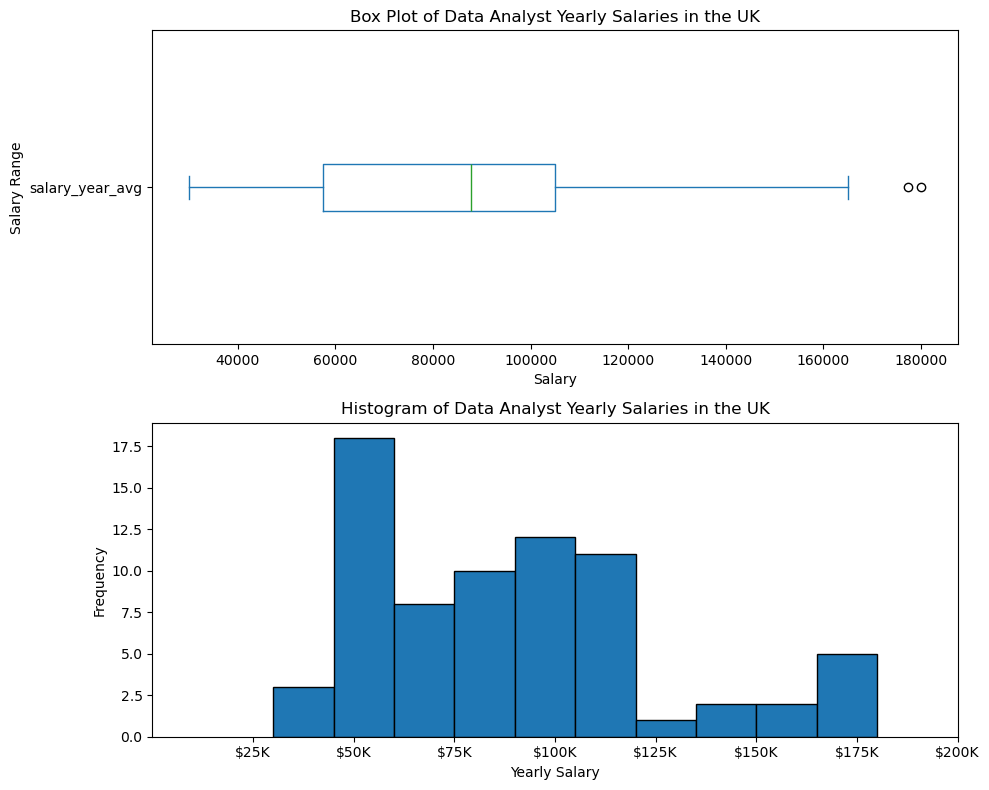

In [57]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))  # Adjust figsize as needed

# Plot box plot
df_da_uk['salary_year_avg'].plot(kind='box', vert=False, ax=ax[0])
ax[0].set_title('Box Plot of Data Analyst Yearly Salaries in the UK')
ax[0].set_xlabel('Salary')
ax[0].set_ylabel('Salary Range')

# Plot histogram
df_da_uk['salary_year_avg'].plot(kind='hist', edgecolor='black', ax=ax[1])
ax[1].set_xlim(25, 200000)
ax[1].set_title('Histogram of Data Analyst Yearly Salaries in the UK')
ax[1].set_xlabel('Yearly Salary')
ax[1].set_ylabel('Frequency')

# Customize x-axis labels
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

## Box Plots

Box plots build on histograms abilty to show the distribution of values. They are great at comparing values.

In [54]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

df_In = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United Kingdom')].copy()
df_In = df_In.dropna(subset=['salary_year_avg'])

job_list = [df_In[df_In['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

C:\Users\PC-USER\AppData\Local\Temp\ipykernel_33772\1301913892.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


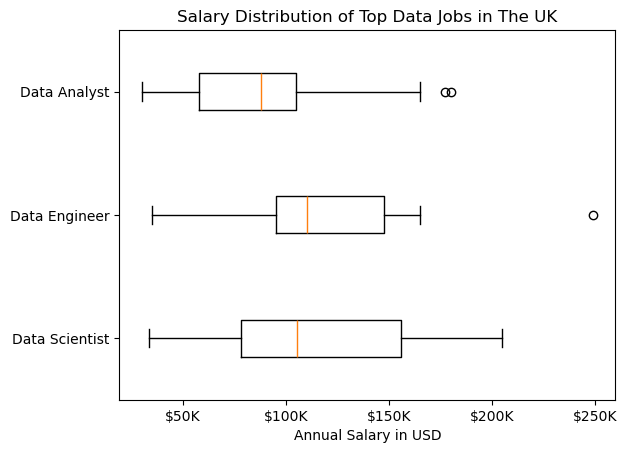

In [55]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution of Top Data Jobs in The UK')
plt.xlabel('Annual Salary in USD')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))